In [332]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
def open_and_read(infile_path_and_name):
    """
    opens a file and returns a long long long string
    
    :infile_path_and_name: string of the path/path/txtFileName.txt from the current directory
    
    
    """
    with open(infile_path_and_name, 'r') as file:
        variable = file.read().replace('\n', '')
        
    return variable

In [35]:
def split_sentence(sentence: str) -> list:
    """
    Takes a sentence in IPA and parses it to individual words by breaking according to
    the " # " IPA string pattern.
    
    :sentence: sentence to parse
    
    :returns: list of individual words
    :rtype: list
    
    """
    words = sentence.split(" # ")
    return words

In [36]:
def rm_stress(word_list):
    """
    Takes a list of strings in IPA that contain prosodic accent marks and removes
    the dashes to clean the data.
    
    :word_list: list of strings
    
    :returns: list of strings without prosodic accent marks
    :rtype: list of strings
    
    """
    new_list = []
    for s in range(len(word_list)):
        word = word_list[s]
        new_word = re.compile(r"'").sub("",word)
        new_list.append(new_word)
    return(new_list)

In [37]:
def syllabize_further(word: str) -> list:
    """
    Takes a string with syllable hyphens and breaks it apart into a list of syllables
    
    :word: str: word form with hyphens marking syllable
    
    :returns: list of individual syllables
    :rtype: list
    
    """
    syllables = word.split("-")
    return syllables

In [38]:
def vowel_lists_append(prescrip_string, descrip_string, prescrip_vowel_ls, descrip_vowel_ls):
    """
    Takes two lists of strings and two strings and appends the vowels of the new strings on to the list of vowels
    
    :prescrip_string: the syllable with the 'correct' vowell
    :descrip_string: the syllable with the student's pronunciation of the vowel
    :prescrip_vowel_ls: the list of all of the 'correct' vowel pronunciations
    :descrip_vowel_ls: the list with all of the student's pronunciations of the vowels
    
    
    :returns: dataframe with lots of good data
    :rtype: pandas DataFrame
    
    """
    
    long_vowel_list = ['a:','e:','i:','o:','u:','ɛ:','æ:','ə:','ʌ:','ɪ:','ɔ:','ɑ:','ʊ:']
    diphthong_list =['au̯','eu̯','iu̯','ou̯','uu̯','ɛu̯','æu̯','əu̯','ʌu̯','ɪu̯','ɔu̯','ɑu̯','ʊu̯',
                     'ai̯','ei̯','ii̯','oi̯','ui̯','ɛi̯','æi̯','əi̯','ʌi̯','ɪi̯','ɔi̯','ɑi̯','ʊi̯',
                     'i̯a','i̯e','i̯i','i̯o','i̯u','i̯ɛ','i̯æ','i̯ə','i̯ʌ','i̯ɪ','i̯ɔ','i̯ɑ','i̯ʊ',
                     'u̯a','u̯e','u̯i','u̯o','u̯u','u̯ɛ','u̯æ','u̯ə','u̯ʌ','u̯ɪ','u̯ɔ','u̯ɑ','u̯ʊ']
                             
    vowel_list = ['a', 'e', 'i', 'o', 'u']
    semivowwel_list =['i̯','u̯',]
    pure_vowel_list = ['a','e','i','o','u','ɛ','æ','ə','ʌ','ɪ','ɔ','ɑ','ʊ']

    boolean = True
    
    while boolean == True:
        if boolean == True:
            for s in range(len(diphthong_list)):
                if diphthong_list[s] in prescrip_string:
                    prescrip_vowel_ls.append(diphthong_list[s])
                    boolean = False
                    break
                else:
                    boolean = True
 

            if boolean == True:
                for i in range(len(vowel_list)):
                    if vowel_list[i] in prescrip_string:
                        prescrip_vowel_ls.append(vowel_list[i])
                        boolean = False
                        break
                    else:
                        boolean = True
        
    
    boolean1 = True
    
    while boolean1 == True:
        
        if boolean1 == True:
            for j in range(len(long_vowel_list)):
                if long_vowel_list[j] in descrip_string:
                    descrip_vowel_ls.append(long_vowel_list[j])
                    boolean1 = False
                    break

            if boolean1 == True:
                for q in range(len(diphthong_list)):
                    if diphthong_list[q] in descrip_string:
                        descrip_vowel_ls.append(diphthong_list[q])
                        boolean1 = False
                        break

            if boolean1 == True:
                for z in range(len(pure_vowel_list)):
                    if pure_vowel_list[z] in descrip_string:
                        descrip_vowel_ls.append(pure_vowel_list[z])
                        boolean1 = False
                        break


    
    #print("Prescriptive vowel list:")
    #print(prescrip_vowel_ls)
    #print("Descriptive vowel list:")
    #print(descrip_vowel_ls)

In [39]:
#descriptive_ls = ['a:']
#prescriptive_ls = ['a']

#descriptive = 'hei̯'
#prescriptive = 'hee'

In [40]:
def string_list_phoneme_compare(response,answer):
    """
    Takes two lists of (IPA) strings--the student response (response) and the correct answer (answer)--
    and compares them against eachother. Then, the function will (1) find mismatches, and 
    (2) return the word, the string index, the correct allophone, and the discrepancy (i.e. the incorrect 
    allophone[s].)
    
    Parameters
    ----------
    response : list of strings
    answer : list of strings
    
    AS OF RIGHT NOW:
        (1) lists of strings must be of equal length
        (2) the number of syllables per string must be of equal length
            
    
    :returns: a table with the aforementioned data
    :rtype: dataframe 
    
    """
    word_index = []
    word = []
    student_pronunciation = []
    indexes = []
    student_allophones = []
    prescriptive_allophones = []
    binary = []
    
    p_syllable_lengths = []
    d_syllable_lengths = []
    
    syllable_header =[]
    p_syllables = []
    d_syllables = []
    syllable_number =[]
    
    if len(response) == len(answer):
        
        for s in range(len(response)): # first nested loop iterates through the strings in the list

            # assign variables to both of the strings because you will be appending them multiple times later on
            answer_word = answer[s]
            response_word = response[s]

            # break each string into a smaller list of individual syllables
            d_list_of_syllables = syllabize_further(response[s]) 
            p_list_of_syllables = syllabize_further(answer[s])

            #p_syllables[s] = p_list_of_syllables
            #d_syllables[s] = d_list_of_syllables

            if len(d_list_of_syllables) == len(p_list_of_syllables): # check to see if there are the same amount of syllables inside each word

                for j in range(len(p_list_of_syllables)): # now iterating through each syllable in the word list (j = syllable number)

                    # assign each syllable to a unique string variable for further iteration
                    descriptive_syllable = d_list_of_syllables[j]
                    prescriptive_syllable = p_list_of_syllables[j]

                    vowel_lists_append(prescriptive_syllable, descriptive_syllable, prescriptive_allophones, student_allophones)

                    word_index.append(s)
                    word.append(answer_word)
                    student_pronunciation.append(response_word)
                    syllable_number.append(j)
                    d_syllables.append(descriptive_syllable)
                    p_syllables.append(prescriptive_syllable)
                    

            else:
                print("Word " + (str(s)) + " in the student response has the wrong number of syllables." )


    #else:
        #print("The two lists do not contain the same amount of strings.")

    data = pd.DataFrame(list(zip(word_index, word, student_pronunciation, syllable_number, p_syllables, d_syllables, prescriptive_allophones,
                                 student_allophones)), columns =['word_number','prescriptive_pronunciation','student_pronunciation','syllable_number','prescriptive_syllable','student_syllable','correct_allophone','student_allophone'])
        
   
            

    return(data)
                        
                    

In [46]:
def datasheet_compile(list_of_lists, prescriptive_list):
    """
    Takes a list of lists of strings and turns them into a list of dataframes that contain all of the information we are looking for
    (see string_list_phoneme_compare function for more information)
    
    Parameters
    ----------
    :list_of_lists: a list of lists of strings; all lists must be the same length
    :prescriptive_list: a list of strings; prescriptive list must be same len as all lists in list_of_lists
    
    Returns
    --------
    :returns: list of dataframes with all of the good data we want
    :rtype: list of pandas DataFrames
    
    """
    ls_of_dfs = []
    for i in range(len(list_of_lists)):
        current_list = list_of_lists[i]
        current_df = string_list_phoneme_compare(current_list, prescriptive_list)
        ls_of_dfs.append(current_df)
        
    return(ls_of_dfs)        

In [133]:
def filter_by_dictionary(dictionary_df, column_criteria, equivelancy_criteria, ls_of_dfs):
    """
    Uses the categorical/meta information from one dataframe (in this case, the dictionary dataframe), and uses some criteria
    within it to filter another dataframe.
    
    Parameters
    ----------
    :dictionary_df: a pandas DataFrame with information relating to how you might want to filter the df
    :column_criteria: a string that is the column name of what you want to filter by in in dictionary_df
    :equivelancy_criteria: what the cells in dictionary_df[column_criteria] are equal to (e.g. 1, False, "<a>", etc.)
    :ls_of_dfs: a list of pandas DataFrames that you want to filter by some criteria
    
    Returns
    --------
    :returns: a list of filtered dataframes
    :rtype: list of pd DataFrames
    
    """

    word_selects = dictionary_df[dictionary_df[column_criteria] == equivelancy_criteria]
    
    new_ls_of_dfs = []
    
    for i in range(len(ls_of_dfs)):
        temp_df = ls_of_dfs[i]
        temp_df = temp_df[temp_df['word_number'].isin(word_selects['list_number'])]
        new_ls_of_dfs.append(temp_df)
        
    return(new_ls_of_dfs)
        

In [300]:
def filter_by_allophone(ls_of_dfs, allophone):
    """
    Filter the entire list of dataframes by a specific allophone.
    
    Parameters
    ----------
    :allophone: the allophone that you want to focus on, e.g. 'a', 'e', etc.
    :ls_of_dfs: a list of pandas DataFrames that you want to filter by some criteria
    
    Returns
    --------
    :returns: a list of filtered dataframes
    :rtype: list of pd DataFrames
    
    """
    
    new_ls_of_dfs = []
    
    for i in range(len(ls_of_dfs)):
        temp_df = ls_of_dfs[i]
        temp_df = temp_df[temp_df['correct_allophone'] == allophone] # right now the code doesn't account for any diphtongs
        new_ls_of_dfs.append(temp_df)
        
    return(new_ls_of_dfs)

In [301]:
def get_proportions(ls_of_dfs):
    """
    
    """
    ls_of_proportions = []
    
    for i in range(len(ls_of_dfs)):
        temp_df = ls_of_dfs[i]
        
        boolean = temp_df['correct_allophone'] == temp_df['student_allophone']
        denominat = len(boolean)
        numerat = boolean.sum()
        proportion = numerat/denominat
        
        ls_of_proportions.append(proportion)
        
    return(ls_of_proportions)  

In [302]:
prescriptive_string = open_and_read("transcriptions/prescriptive_ls.txt") # import transcription.txt files as strings
partic01_string = open_and_read("transcriptions/partic01.txt")
partic02_string = open_and_read("transcriptions/partic02.txt")
partic03_string = open_and_read("transcriptions/partic03.txt")
partic04_string = open_and_read("transcriptions/partic04.txt")
partic05_string = open_and_read("transcriptions/partic05.txt")
partic07_string = open_and_read("transcriptions/partic07.txt")

In [303]:
prescriptive_raw = split_sentence(prescriptive_string) # split strings into individual words: lists of strings
partic01_raw = split_sentence(partic01_string)
partic02_raw = split_sentence(partic02_string)
partic03_raw = split_sentence(partic03_string)
partic04_raw = split_sentence(partic04_string)
partic05_raw = split_sentence(partic05_string)
partic07_raw = split_sentence(partic07_string)

In [304]:
prescriptive = rm_stress(prescriptive_raw) # clean data of any prosodic accent marks
partic01 = rm_stress(partic01_raw)
partic02 = rm_stress(partic02_raw)
partic03 = rm_stress(partic03_raw)
partic04 = rm_stress(partic04_raw)
partic05 = rm_stress(partic05_raw)
partic07 = rm_stress(partic07_raw)

In [313]:
study_data = datasheet_compile(data,prescriptive) # turn the list of lists of strings into a list of dataframes
study_data[1].head() # print a small amount as demonstraation

,word_number,prescriptive_pronunciation,student_pronunciation,syllable_number,prescriptive_syllable,student_syllable,correct_allophone,student_allophone
0,0,i-se,i-se,0,i,i,i,i
1,0,i-se,i-se,1,se,se,e,e
2,1,kom-bi-na-si̯on,kom-bi-na-si̯on,0,kom,kom,o,o
3,1,kom-bi-na-si̯on,kom-bi-na-si̯on,1,bi,bi,i,i
4,1,kom-bi-na-si̯on,kom-bi-na-si̯on,2,na,na,a,a


In [306]:
data = [partic01,partic02,partic03,partic04,partic05,partic07] # compile the lists of strings into ANOTHER LIST

In [329]:
survey_data = pd.read_csv("survey_data.csv")
survey_data

,partic_number,age,self_identify,spanish_travel,travel_abroad,heritage_exposure,formal_instruct,years_formal_instruct,explicit_pronunciation,spanish_exposure,spanish_production,last_spanish,learn_spanish
0,partic10,20,Intermediate-Advanced,Yes,No,No,Yes,7.00,Yes,Sometimes,Sometimes,This month,Yes
1,partic04,21,Advanced,No,No,No,Yes,7.00,Yes,NaN,Rarely,This week,No
2,partic05,47,Beginner-Intermediate,Yes,No,No,No,0.00,No,Sometimes,Rarely,This week,Yes
3,partic02,28,Beginner-Intermediate,No,No,No,Yes,3.00,Yes,Sometimes,Almost never,It's been a long time,Yes
4,partic03,21,Beginner-Intermediate,Yes,No,No,Yes,3.00,Yes,Rarely,Sometimes,This week,No
5,partic06,27,Beginner,Yes,No,No,Yes,0.02,Yes,Sometimes,Almost never,It's been a long time,No
6,partic01,20,Beginner,Yes,No,No,Yes,2.00,Yes,Almost never,Almost never,It's been a long time,No
7,partic07,46,Intermediate,Yes,No,No,Yes,4.00,Yes,Rarely,Rarely,This year,No
8,partic08,19,Advanced,Yes,No,No,Yes,5.00,Yes,Rarely,Sometimes,This month,Yes
9,partic09,17,Beginner-Intermediate,No,No,No,Yes,3.00,Yes,Rarely,Rarely,This week,Yes


In [337]:
index_numbers = [6,3,4,1,2,7]
years_instruct = []

for i in range(len(index_numbers)):
    integer = index_numbers[i]
    years = survey_data['years_formal_instruct'][integer]
    years_instruct.append(years)

years_instruct

[2.0, 3.0, 3.0, 7.0, 0.0, 4.0]

In [307]:
dictionary = pd.read_csv("dictionary.csv") # import the dictionary for meta-data on specific words
dictionary.head(3)

,word,vowel_focus1,vowel_focus2,init_vowel,term_vowel,cognate,list_number
0,taza,a,NaN,0,1,0,20
1,sabe,e,a,0,1,0,13
2,casi,i,a,0,1,0,6


In [308]:
# some simple descriptive stats about the words in the current list
vowel_init = dictionary[dictionary['init_vowel'] == 1] # count vowel-initial words in df
vowel_init_count = len(vowel_init)
print("Words in set that are vowel initial: " + str(vowel_init_count))

term_vowel = dictionary[dictionary['term_vowel'] == 1]
term_vowel_count = len(term_vowel)
print("Words in set that are terminal vowel: " + str(term_vowel_count))

cognates = dictionary[dictionary['cognate'] == 1]
cognates_count = len(cognates)
print("Words in set that are cognates: " + str(cognates_count))

Words in set that are vowel initial: 15
Words in set that are terminal vowel: 17
Words in set that are cognates: 6


In [310]:
e_accuracy = get_proportions(e_dfs)
e_accuracy_mean = np.mean(e_accuracy)
e_accuracy_std = np.std(e_accuracy)
print("For the allophone 'e,' the participants scored an average of " + str(e_accuracy_mean) + " with a std of " + str(e_accuracy_std))

For the allophone 'e,' the participants scored an average of 0.47222222222222227 with a std of 0.11453071182271278


In [292]:
total_accuracy = get_proportions(study_data)
total_accuracy_mean = np.mean(total_accuracy)
total_accuracy_std = np.std(total_accuracy)
print("In total, he particpants scored an average of " + str(total_accuracy_mean) +
      " accuracy with std of: " + str(total_accuracy_std))

In total, he particpants scored an average of 0.7711864406779662 accuracy with std of: 0.12329464882935139


In [293]:
cognate_dfs = filter_by_dictionary(dictionary, "cognate", 1, study_data) # create a list of dfs that only accounts for the cognates in the study
cognate_accuracy = get_proportions(cognate_dfs)
cognate_accuracy
cognate_accuracy_mean = np.mean(cognate_accuracy)
cognate_accuracy_std = np.std(cognate_accuracy)
print("For cognates, the particpants scored an average of " + str(cognate_accuracy_mean) +
      " accuracy with std of: " + str(cognate_accuracy_std))

For cognates, the particpants scored an average of 0.7575757575757577 accuracy with std of: 0.1975515880364439


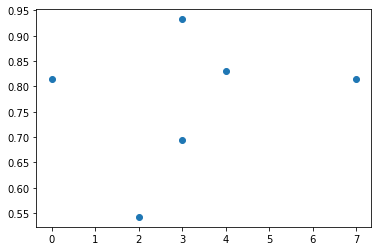

In [338]:

plt.scatter(years_instruct, total_accuracy)

In [311]:
def descriptive_stats(ls_of_dfs, allophone):
    """
    Returns some basic descriptive statistics about the selected allophone in the input dataframes.
    
    """
    
    
    new_ls_dfs = filter_by_allophone(ls_of_dfs, allophone)
    allophone_frequency = len(new_ls_dfs[0])
    
    print("In this word list, the allophone [" + allophone + "] occured in " + str(allophone_frequency) + " syllables.")
    
    accuracy_ls = get_proportions(new_ls_dfs)
    accuracy_mean = np.mean(accuracy_ls)
    accuracy_std = np.std(accuracy_ls)
    
    print("For this allophone:")
    print("The particpants scored an average of " + str(accuracy_mean * 100) +
      "% accuracy with standard deviation of: " + str(accuracy_std * 100) + "%")
    print()
    
    
    allophonic_errors = []
    nex_ls_dfs = []
    
    for i in range(len(ls_of_dfs)):
        temp_df = new_ls_dfs[i]
        errors_df = temp_df[temp_df['correct_allophone'] != temp_df['student_allophone']]
        #print(errors_df)
        nex_ls_dfs.append(errors_df)
        
        
    for j in range(len(nex_ls_dfs)):
        errors = nex_ls_dfs[j]['student_allophone']
        errors_ls = list(errors)
        print(errors_ls)
        
        #for s in range(len(errors_ls)):
         #   error = errors_ls[s]
          #  allophonic_errors.append(error)
            
    
    return(allophonic_errors)
        

In [312]:
descriptive_stats(study_data, 'e')

In this word list, the allophone [e] occured in 12 syllables.
For this allophone:
The particpants scored an average of 47.22222222222223% accuracy with standard deviation of: 11.453071182271279%

['ei̯', 'ɛ', 'ei̯', 'ɛ', 'i', 'ɛ', 'ei̯', 'ɛ']
['ɛ', 'ɛ', 'ɛ', 'ɛ']
['ɛ', 'ɛ', 'ɛ', 'ʌ', 'ɛ', 'ɛ']
['ɛ', 'ɛ', 'ei̯', 'ɛ', 'ei̯', 'ɛ']
['ei̯', 'ɛ', 'ɛ', 'ɛ', 'ɛ', 'ei̯']
['ei̯', 'ɛ', 'ei̯', 'ɛ', 'ɛ', 'ɛ', 'ei̯', 'ɛ']


[]

In [296]:
descriptive_stats(study_data, 'a')

In this word list, the allophone [a] occured in 21 syllables.
The particpants scored an average of 86.5079365079365% accuracy with standard deviation of: 15.409910983291747%

['i', 'ei̯', 'a:', 'ʌ', 'a:', 'æ', 'a:', 'ə', 'ɛ']
[]
['ɪ', 'æ', 'ai̯', 'ə', 'ʌ']
[]
['ə', 'ə']
['ʌ']


[]

In [297]:
descriptive_stats(study_data, 'i')

In this word list, the allophone [i] occured in 11 syllables.
The particpants scored an average of 75.75757575757576% accuracy with standard deviation of: 17.92751449424126%

['ɪ', 'i̯a', 'i̯ɔ', 'o', 'ɪ', 'ɪ']
[]
['ɪ', 'ɪ', 'o', 'ɪ']
['i:', 'ɪ', 'ɪ']
['ou̯', 'i̯u']
['ɪ']


[]

In [298]:
descriptive_stats(study_data,'u')

In this word list, the allophone [u] occured in 6 syllables.
The particpants scored an average of 88.8888888888889% accuracy with standard deviation of: 12.422599874998832%

['uu̯']
[]
['ə']
['ə', 'uu̯']
[]
[]


[]

In [299]:
descriptive_stats(study_data,'o')

In this word list, the allophone [o] occured in 13 syllables.
The particpants scored an average of 84.61538461538461% accuracy with standard deviation of: 17.200522903844536%

['i̯a', 'i̯ɔ', 'o', 'a', 'ə', 'ou̯']
[]
['a', 'o', 'a']
[]
['ou̯', 'i̯u', 'ə']
[]


[]

In [76]:
#def averages(dictionary_df, column_criteria, equivelancy_criteria, ls_of_dfs):
words = dictionary[dictionary['cognate'] == 1]
print(words)
df = dfs[1]
df[df['word_number'].isin(words['list_number'])]

           word vowel_focus1 vowel_focus2  init_vowel  term_vowel  cognate  \
6     educación            e            u           1           0        1   
7    importante            i            e           1           1        1   
8   oportunidad            o            i           1           0        1   
9          usar            u          NaN           1           0        1   
16    funcionar            u            o           0           0        1   
17  combinación            a            i           0           0        1   

    list_number  
6             3  
7            21  
8            14  
9             7  
16            8  
17            1  


,word_number,prescriptive_pronunciation,student_pronunciation,syllable_number,prescriptive_syllable,student_syllable,correct_allophone,student_allophone
2,1,kom-bi-na-si̯on,kom-bi-na-si̯on,0,kom,kom,o,o
3,1,kom-bi-na-si̯on,kom-bi-na-si̯on,1,bi,bi,i,i
4,1,kom-bi-na-si̯on,kom-bi-na-si̯on,2,na,na,a,a
5,1,kom-bi-na-si̯on,kom-bi-na-si̯on,3,si̯on,si̯on,i̯o,i̯o
9,3,e-ðu-ka-si̯on,e-du-ka-si̯on,0,e,e,e,e
10,3,e-ðu-ka-si̯on,e-du-ka-si̯on,1,ðu,du,u,u
11,3,e-ðu-ka-si̯on,e-du-ka-si̯on,2,ka,ka,a,a
12,3,e-ðu-ka-si̯on,e-du-ka-si̯on,3,si̯on,si̯on,i̯o,i̯o
19,7,u-saɾ,u-saɾ,0,u,u,u,u
20,7,u-saɾ,u-saɾ,1,saɾ,saɾ,a,a
